# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
import json

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
#btc_price
btc_price = btc_price ['data']['1']['quotes']['USD']['price']

In [7]:
# Fetch current ETH price
eth_price = requests.get(eth_url).json()
#eth_price
eth_price = eth_price['data']['1027']['quotes']['USD']['price']

In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $21216.43
The current value of your 5.3 ETH is $2569.39


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=current_date ,
    end=current_date  
).df

# Preview DataFrame
df_portfolio.head()


AGG                                        SPY  \
                             open    high      low    close   volume    open   
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.445
Current SPY closing price: $334.55


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16727.50
The current value of your 200 AGG shares is $23889.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame

total_portfolio_dict = {
    "amount": [my_btc_value+my_eth_value,my_spy_value+my_agg_value],
}

df_savings = pd.DataFrame(total_portfolio_dict,index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,23785.819
shares,40616.500


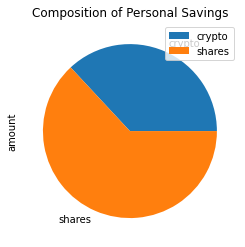

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching  your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995571,1.007673,1.002718,0.997016,1.006147,0.999885,0.999555,1.000139,0.996701,1.002356,...,1.006821,0.990389,0.995349,1.008376,1.003994,0.993542,1.012728,0.995778,1.007521,1.007694
2,0.994344,1.016567,0.994408,1.006336,1.005623,0.986409,1.017388,0.989725,0.994471,0.994342,...,1.002126,0.988282,0.992396,1.009852,1.001073,0.988836,1.011162,0.986923,1.005062,1.006271
3,1.002199,1.015419,0.999899,1.003133,1.013180,0.991327,1.010997,0.993617,0.997464,0.993628,...,1.006314,0.996601,0.994240,1.019249,0.991008,0.995270,0.993735,0.992436,1.000434,1.014662
4,1.008892,1.033797,0.997645,0.998767,1.020496,0.994692,1.005211,0.995467,0.996076,0.976442,...,0.997741,0.998029,0.986559,1.017838,0.990498,1.003307,0.995943,0.994203,1.007533,1.018812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.341589,12.285280,8.675473,7.541747,3.548100,5.138886,5.239946,6.839890,12.636835,7.810600,...,4.069938,12.149434,6.768462,23.070755,4.142419,12.045950,15.407404,6.169880,3.611138,14.845316
7557,10.428499,12.205159,8.634899,7.556277,3.544265,5.147537,5.200230,6.928154,12.753856,7.818069,...,4.070837,12.235630,6.812116,23.112576,4.160114,12.088950,15.259290,6.140424,3.601162,14.870855
7558,10.394265,12.347155,8.543884,7.564039,3.609262,5.120702,5.157770,6.867844,12.770021,7.847483,...,4.065951,12.260965,6.822295,22.963691,4.130158,11.967350,15.152440,6.162008,3.602303,14.744826
7559,10.309347,12.283963,8.511743,7.613407,3.695437,5.137763,5.067529,6.940961,12.842874,7.827045,...,4.018411,12.402304,6.796397,22.989807,4.135435,11.770315,15.303985,6.187904,3.607126,14.811289


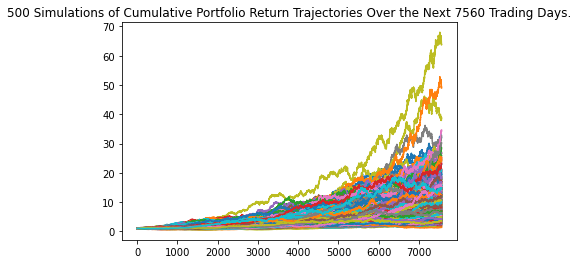

In [23]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

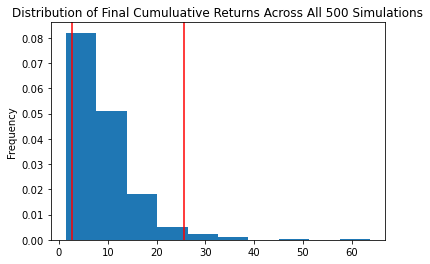

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
stat = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(stat)

count           500.000000
mean              9.234448
std               6.469431
min               1.380896
25%               5.063761
50%               7.385137
75%              11.614754
max              63.812887
95% CI Lower      2.671373
95% CI Upper     25.607077
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment_thirty = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stat[8]*10000,2)
ci_upper = round(stat[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_thirty} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26713.73 and $256070.77


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stat[8]*10000,2)
ci_upper = round(stat[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26713.73 and $256070.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003795,1.006982,1.004954,1.007492,1.014188,0.996350,0.994754,1.014207,0.988788,1.005067,...,0.995282,0.991387,0.995557,0.993641,1.002221,0.982085,0.998041,1.001325,1.000604,0.991387
2,1.011615,1.007455,0.996972,1.013819,1.023580,0.999016,0.990355,1.014631,0.991004,0.999452,...,0.997355,0.998877,0.989079,0.985913,1.005254,0.989898,1.010447,1.008670,1.014394,0.998169
3,1.011800,1.019698,0.987817,1.019705,1.020644,1.012128,0.990398,1.017333,0.989567,0.995597,...,0.997088,0.998508,0.981648,0.990239,1.017921,0.981684,1.012769,0.997386,1.024901,1.005792
4,1.020579,1.019981,0.979041,1.016406,1.024914,0.998096,1.004337,1.020911,0.980487,0.997152,...,0.985555,1.016954,0.974446,0.999724,1.010554,0.977256,1.016146,0.999858,1.032027,1.014012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.496718,1.237075,0.915370,1.113936,1.529798,1.788827,1.392767,1.438381,0.818902,0.959741,...,1.047270,1.342121,1.726247,1.422715,1.209918,1.360010,1.108109,1.354239,1.116119,1.566249
1257,1.502806,1.229659,0.911215,1.110053,1.510776,1.772505,1.389457,1.447884,0.827291,0.969073,...,1.058970,1.318891,1.727205,1.401150,1.210655,1.366930,1.104257,1.355611,1.119792,1.582058
1258,1.503169,1.239090,0.917487,1.116795,1.521852,1.789647,1.394244,1.445168,0.831395,0.973409,...,1.058370,1.325834,1.734844,1.425067,1.214832,1.378832,1.120112,1.342138,1.113016,1.601884
1259,1.515056,1.241243,0.915155,1.121282,1.505480,1.765977,1.369442,1.427452,0.838002,0.978440,...,1.073691,1.320758,1.743127,1.426872,1.219324,1.372210,1.125421,1.333744,1.118346,1.612815


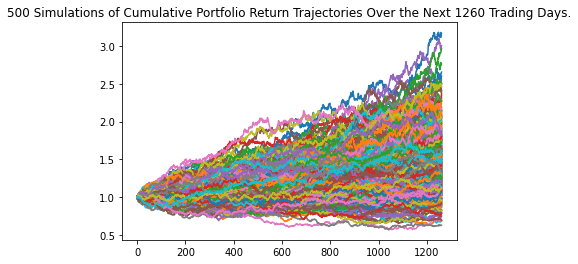

In [30]:
# Plot simulation outcomes
line_plot_five_year = MC_five_year.plot_simulation()
line_plot_five_year.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

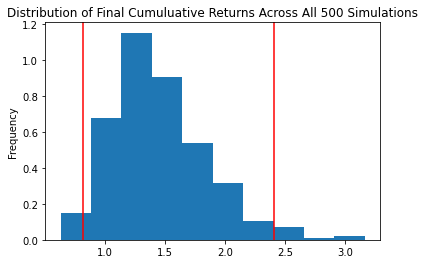

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_five_year = MC_five_year.plot_distribution()
dist_plot_five_year.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_five_year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(stat_five_year)

count           500.000000
mean              1.455942
std               0.400553
min               0.632276
25%               1.169511
50%               1.387730
75%               1.670421
max               3.165574
95% CI Lower      0.820876
95% CI Upper      2.407569
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stat[8]*10000,2)
ci_upper_five = round(stat[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $26713.73 and $256070.77


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002718,0.988227,1.010260,1.005844,1.000783,1.000385,0.997762,1.004992,1.012151,1.004848,...,0.996008,1.005042,0.998170,0.997408,0.992754,1.015892,1.005081,0.997168,1.008426,1.008658
2,1.005802,0.987085,1.011453,1.006818,1.005693,0.999146,0.997504,1.013536,1.008612,0.995968,...,0.992663,1.007331,1.002629,1.002808,0.986579,1.019666,1.007796,1.000762,1.013874,0.988326
3,1.014920,0.987529,1.012451,1.012920,1.028528,0.999367,1.007078,1.014353,1.001047,0.999634,...,1.001846,1.005411,1.006322,1.008197,0.994941,1.015673,1.001154,1.001404,1.004170,0.988444
4,1.011761,0.994862,1.007188,1.024193,1.025081,1.002734,1.017854,1.028982,0.994057,1.004519,...,1.013899,1.007313,1.007678,1.002304,0.986884,1.011558,1.007558,1.003615,1.002460,0.994339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.599935,2.677302,2.051017,2.450365,2.649783,1.768573,1.289882,1.122509,1.509624,1.861610,...,1.609304,2.168763,1.011744,2.189859,3.414640,2.487052,3.866689,3.241417,2.193826,2.439240
2517,1.593371,2.674738,2.056041,2.445193,2.621414,1.779062,1.282711,1.122913,1.522510,1.873786,...,1.605315,2.163743,1.011389,2.168462,3.403805,2.483890,3.864130,3.202670,2.192749,2.454682
2518,1.615207,2.666213,2.089805,2.457126,2.625347,1.788204,1.279544,1.135528,1.518865,1.884339,...,1.628221,2.145756,1.022209,2.176620,3.395470,2.482729,3.901483,3.208909,2.212085,2.425385
2519,1.608281,2.673236,2.089036,2.446507,2.649142,1.802088,1.285034,1.142431,1.523220,1.893430,...,1.609026,2.137243,1.013481,2.180165,3.397868,2.453324,3.921467,3.174859,2.208556,2.412217


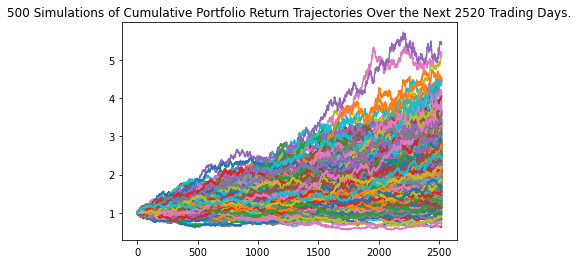

In [36]:
# Plot simulation outcomes
line_plot_ten_year = MC_ten_year.plot_simulation()
line_plot_ten_year.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

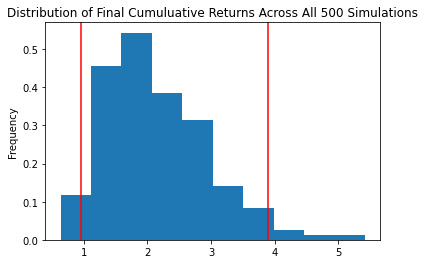

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_ten_year = MC_ten_year.plot_distribution()
dist_plot_ten_year.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(stat_ten_year)

count           500.000000
mean              2.141332
std               0.793310
min               0.632698
25%               1.548748
50%               2.017155
75%               2.645955
max               5.418368
95% CI Lower      0.958526
95% CI Upper      3.890243
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stat[8]*10000,2)
ci_upper_ten = round(stat[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $26713.73 and $256070.77
